# EM Algorithm for 2-D GMM estimation

In [1514]:
#' Setting up environment 

import numpy as np
import pandas as pd
import random
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d, Axes3D 
plt.style.use('seaborn')
random.seed(221)

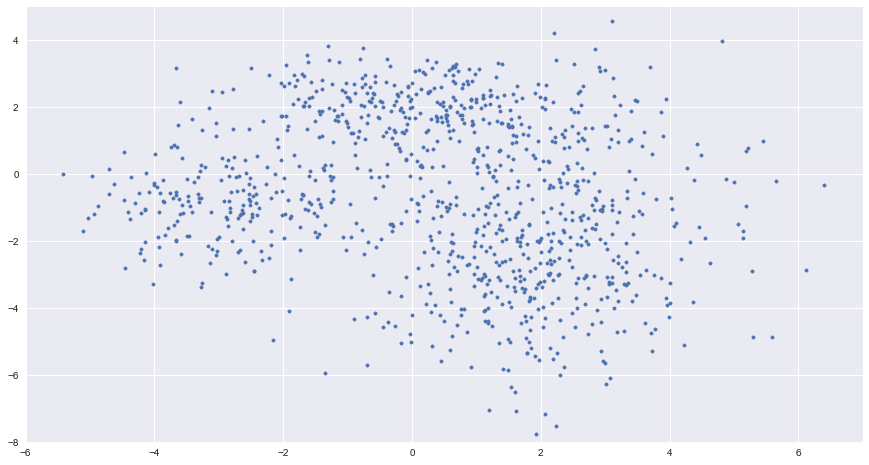

In [1478]:
# Use the example data

data = pd.read_csv('GMMdata.txt', sep="\s+")
data = data.values
plt.figure(figsize=(15, 8))
plt.axis([-6, 7, -8, 5])
plt.scatter(data[:, 0], data[:, 1], s=12)
plt.show()

In [1479]:
np.cov(data.T)

array([[ 5.05228401, -0.9785568 ],
       [-0.9785568 ,  5.63551659]])

## Variable Initialization

**n_clusters** number of clasters: k<br>
**n_points** number of data points: n<br>
**Mu**  mean vectors of each gaussian components<br>
**Var** covarinance matrix of each gaussian components<br>
**W** weight matrix (n by k) , always takes starting value = 1/n_clusters<br>
**Pi** proportion of each claster (k dim vector), always takes starting value = 1/n_clusters

## Try three clusters

In [1480]:
n_clusters = 3
n_points = len(data)
Mu = [[2,-2], [0,2], [-3,-1]]   # True value close to 2,-2  0,2  -2,-1
Var = [np.matrix([[2, -1], [-1, 3]]), np.matrix([[2, -1], [-1, 3]]), np.matrix([[2, -1], [-1, 3]])]  
Pi = [1 / n_clusters] * n_clusters
W = np.ones((n_points, n_clusters)) / n_clusters 
# Pi = W.sum(axis=0) / W.sum()

### E-Step: Evaluating W and Pi

In [1481]:
def update_W(X, Mu, Var, Pi):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], Var[i])
    W = pdfs / pdfs.sum(axis=1).reshape(-1, 1)
    return W


### M-Step: Updating mu and var using W

In [1482]:
def update_Pi(W):
    Pi = W.sum(axis=0) / W.sum()
    return Pi


def update_Mu(X, W):
    n_clusters = W.shape[1]
    Mu = np.zeros((n_clusters, 2))
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=W[:, i])
    return Mu


def update_Var(X, Mu, W):
    n_clusters = W.shape[1]
    Var = [np.matrix([[0, 0], [0, 0]])] * n_clusters
    for i in range(n_clusters):
        Ai = np.matrix([[0, 0], [0, 0]])
        for j in range(n_points):
            Ai = Ai + np.dot(np.matrix((X[j] - Mu[i])).T,np.matrix((X[j] - Mu[i]))) * W[j, i]
            Var[i] = Ai/ W.sum(axis=0)[i]
    return Var

### Calculate log liklihood value

In [1483]:
def logLH(X, Pi, Mu, Var):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], Var[i])
    return np.sum(np.log(pdfs.sum(axis=1)))

### Calculate BIC value

In [1484]:
def BIC_val(X, Pi, Mu, Var, n_clusters, n_points):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], Var[i])
    return  - 2 * logLH(X, Pi, Mu, Var) + (n_clusters * 6 - 1) * np.log(n_points)

### Calculate AIC value

In [1485]:
def AIC_val(X, Pi, Mu, Var, n_clusters):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], Var[i])
    return  - 2 * logLH(X, Pi, Mu, Var) + (n_clusters * 6 - 1) * 2

### Plot clasters during the process

In [1463]:
def plot_clusters(X, W):
    plt.figure(figsize=(5,4))
    plt.axis([-6, 7, -8, 5])
    plt.scatter(X[:, 0], X[:, 1], color = W, s = 10)
    plt.show()

### Process of first five steps

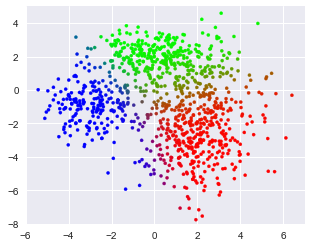

iteration: 1
log-likehood:-4514.641
BIC:9146.714
AIC:9063.282


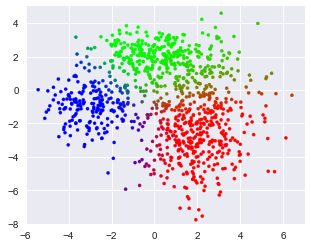

iteration: 2
log-likehood:-4332.822
BIC:8783.076
AIC:8699.644


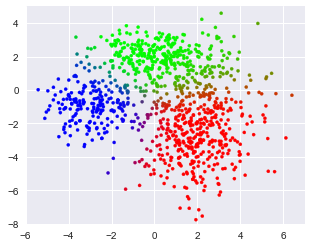

iteration: 3
log-likehood:-4304.575
BIC:8726.582
AIC:8643.150


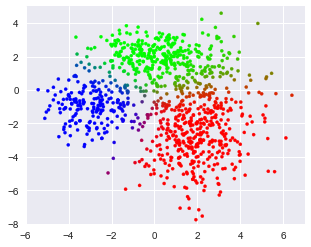

iteration: 4
log-likehood:-4289.153
BIC:8695.737
AIC:8612.305


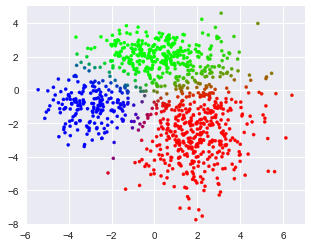

iteration: 5
log-likehood:-4282.590
BIC:8682.612
AIC:8599.180


In [1439]:
loglh = []
bic_val = []
aic_val = []
for i in range(5):
    loglh.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    plot_clusters(data, W)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    print('iteration:' , i+1)
    print('log-likehood:%.3f'%loglh[-1])
    print('BIC:%.3f'%bic_val[-1])
    print('AIC:%.3f'%aic_val[-1])
    Var = update_Var(data, Mu, W)

In [ ]:
# Stop rule1: 100 iteration

loglh_1 = []
bic_val = []
aic_val = []
for i in range(100):
    loglh_1.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var(data, Mu, W)

In [1486]:
# Stop rule2: diff of log-likelihood small enough

loglh_1 = [-1]
bic_val = []
aic_val = []
diff = 2
while diff > 0.01:
    loglh_1.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var(data, Mu, W)
    diff = abs(loglh_1[-1] - loglh_1[-2])

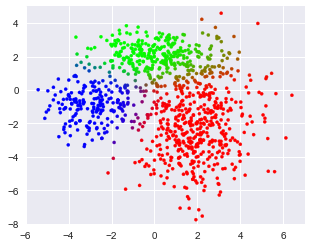

In [1399]:
plot_clusters(data, W)

In [1487]:
print(loglh_1[-1], bic_val[-1], aic_val[-1], Mu, Var, Pi)

-4273.40419492 8664.24022958 8580.80838983 [[ 1.88186909 -1.95266271]
 [ 0.09473358  2.04766246]
 [-2.80084346 -0.87864765]] [matrix([[ 1.91675009,  0.22942282],
        [ 0.22942282,  4.51058426]]), matrix([[ 2.05736493, -0.13117201],
        [-0.13117201,  0.56407972]]), matrix([[ 1.19810914,  0.08997519],
        [ 0.08997519,  1.05092756]])] [ 0.51331594  0.28330177  0.20338228]


In [1488]:
len(bic_val)

33

## Try two clusters

In [1489]:
n_clusters = 2
n_points = len(data)
Mu = [[-2,0], [0, 0]]   # , [2, 0]  True value close to 2,-2  0,2  -2,-1
Var = [np.matrix([[2, -1], [-1, 3]]), np.matrix([[2, -1], [-1, 3]])] # , np.matrix([[2, -1], [-1, 3]])
Pi = [1 / n_clusters] * n_clusters
W = np.ones((n_points, n_clusters)) / n_clusters 
# Pi = W.sum(axis=0) / W.sum()


def plot_clusters(X, W):
    W1 = W[:,0]
    W2 = W[:,1]
    W3 = np.zeros((1, 1000))
    c = np.matrix(np.vstack((W1,W2,W3)))
    W_new = np.array(c.T)
    plt.figure(figsize=(5,4))
    plt.axis([-6, 7, -8, 5])
    plt.scatter(X[:, 0], X[:, 1], color = W_new, s = 10)
    plt.show()

In [1490]:
loglh = []
bic_val = []
aic_val = []
for i in range(3):
    loglh.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    # plot_clusters(data, W)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    print('log-likehood:%.3f'%loglh[-1])
    print('BIC:%.3f'%bic_val[-1])
    print('AIC:%.3f'%aic_val[-1])
    Var = update_Var(data, Mu, W)

log-likehood:-5129.851
BIC:10335.686
AIC:10281.701
log-likehood:-4449.070
BIC:8974.124
AIC:8920.139
log-likehood:-4441.007
BIC:8957.999
AIC:8904.013


In [388]:
# Stop rule1: 100 iteration

loglh_1 = []
bic_val = []
aic_val = []
for i in range(100):
    loglh_1.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var(data, Mu, W)

In [1491]:
# Stop rule2: diff of log-likelihood small enough

loglh_1 = [-1]
bic_val = []
aic_val = []
diff = 2
while diff > 0.01:
    loglh_1.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var(data, Mu, W)
    diff = abs(loglh_1[-1] - loglh_1[-2])

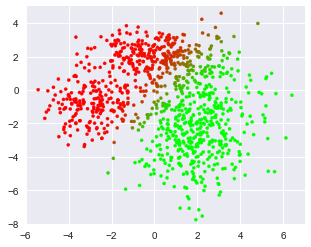

In [1341]:
plot_clusters(data, W)

In [1492]:
print(loglh_1[-1],bic_val[-1], aic_val[-1], Mu, Var, Pi)

-4358.90908598 8793.80348004 8739.81817197 [[-1.24186589  0.73987127]
 [ 1.9416646  -1.8236918 ]] [matrix([[ 3.32370696,  1.91503247],
        [ 1.91503247,  2.96495756]]), matrix([[ 1.78491736,  0.27716386],
        [ 0.27716386,  4.92556966]])] [ 0.47697829  0.52302171]


In [1424]:
len(bic_val)

60

## Try four clusters

In [1425]:
n_clusters = 4
n_points = len(data)
Mu = [[-2,0], [0, 0], [2,-2],[0,2]]   # , [2, 0]  True value close to 2,-2  0,2  -2,-1
Var = [np.matrix([[2, -1], [-1, 3]]), np.matrix([[2, -1], [-1, 3]]),np.matrix([[2, -1], [-1, 3]]), np.matrix([[2, -1], [-1, 3]])] # , np.matrix([[2, -1], [-1, 3]])
Pi = [1 / n_clusters] * n_clusters
W = np.ones((n_points, n_clusters)) / n_clusters 
# Pi = W.sum(axis=0) / W.sum()


def plot_clusters(X, W):
    W1 = W[:,0]
    W2 = W[:,1]
    W3 = W[:,2]
    c = np.matrix(np.vstack((W1,W2,W3)))
    W_new = np.array(c.T)
    plt.figure(figsize=(5,4))
    plt.axis([-6, 7, -8, 5])
    plt.scatter(X[:, 0], X[:, 1], color = W_new, s = 10)
    plt.show()

In [1426]:
loglh = []
bic_val = []
aic_val = []
for i in range(3):
    loglh.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    # plot_clusters(data, W)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    print('log-likehood:%.3f'%loglh[-1])
    print('BIC:%.3f'%bic_val[-1])
    print('AIC:%.3f'%aic_val[-1])
    Var = update_Var(data, Mu, W)

log-likehood:-4624.973
BIC:9408.825
AIC:9295.946
log-likehood:-4352.974
BIC:8864.827
AIC:8751.949
log-likehood:-4318.175
BIC:8795.228
AIC:8682.350


In [393]:
# Stop rule1: 100 iteration

loglh_1 = []
bic_val = []
aic_val = []
for i in range(100):
    loglh_1.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var(data, Mu, W)

In [1427]:
# Stop rule2: diff of log-likelihood small enough

loglh_1 = [-1]
bic_val = []
aic_val = []
diff = 2
while diff > 0.01:
    loglh_1.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var(data, Mu, W)
    diff = abs(loglh_1[-1] - loglh_1[-2])

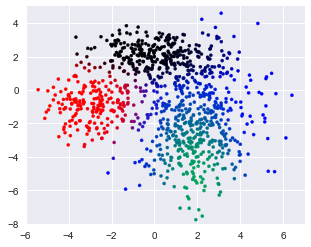

In [1266]:
plot_clusters(data, W)

In [1428]:
print(loglh_1[-1],bic_val[-1], aic_val[-1], Mu, Var,Pi)

-4268.65423087 8696.18683316 8583.30846175 [[-2.83262613 -0.87245166]
 [ 1.81105045 -3.06246331]
 [ 1.84487852 -1.41730386]
 [ 0.08798132  2.05119434]] [matrix([[ 1.15855155,  0.08577833],
        [ 0.08577833,  1.05637784]]), matrix([[ 0.88151348, -0.08347249],
        [-0.08347249,  2.83613277]]), matrix([[ 2.49334038,  0.21162539],
        [ 0.21162539,  4.60720611]]), matrix([[ 2.02821152, -0.15639128],
        [-0.15639128,  0.54894845]])] [ 0.19935075  0.15075098  0.37434135  0.27555692]


In [1374]:
len(bic_val)

116

## Generate fitted GMM  (Rerun 3-clusters)

In [ ]:
print(loglh_1[-1], bic_val[-1], aic_val[-1], Mu, Var,Pi)

In [1442]:
mu1, var1 = Mu[0],  Var[0]
mu2, var2 = Mu[1],  Var[1]
mu3, var3 = Mu[2],  Var[2]

In [1122]:
t = 3

num1, mu1, var1 = 204*t,  Mu[0],  Var[0]
X1 = np.random.multivariate_normal(mu1, var1, num1)

num2, mu2, var2 = 517*t,  Mu[1],  Var[1]
X2 = np.random.multivariate_normal(mu2, var2, num2)

num3, mu3, var3 = 279*t,  Mu[2],  Var[2]
X3 = np.random.multivariate_normal(mu3, var3, num3)

X = np.vstack((X1, X2, X3))

In [ ]:
plt.figure(figsize=(10, 8))
plt.axis([-6, 7, -8, 5])
plt.scatter(X1[:, 0], X1[:, 1], s=5)
plt.scatter(X2[:, 0], X2[:, 1], s=5)
plt.scatter(X3[:, 0], X3[:, 1], s=5)
plt.show()

### 2D Contours (Rerun 3-clusters)

In [1443]:
# Extract x and y

X = data
x = X[:, 0]
y = X[:, 1]

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)

-6.60167698 7.58644598 -8.9886289 5.8238231


In [1229]:
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

#### Solution 1 (get f) Using KDE to get approximation, need generate data points

In [938]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])  # need generate data points here
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

#### Solution 2 (get f) Using EM results as true values, do NOT need generate data points

In [1230]:
D1 = multivariate_normal(mean=mu1, cov=var1)
D2 = multivariate_normal(mean=mu2, cov=var2)
D3 = multivariate_normal(mean=mu3, cov=var3)

def f(x, y):
    return 0.51331594 * D1.pdf([x,y]) + 0.28330177  * D2.pdf([x,y]) + 0.20338228 * D3.pdf([x,y]) 

x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)

z = []
for i in range(100):
    for j in range(100):
        z.append(f(x[i], y[j]))

z = np.array(z) 
f = z.reshape((100, 100))

#### 2D Contours (conpare solution 1 and 2) 

In [1231]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f) #, colors='k'
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.scatter(X[:, 0], X[:, 1], s=5, c = 'y')
plt.title('Contours of Constant Probability Density')  # 2D Gaussian Kernel density estimation

Text(0.5, 1.0, 'Contours of Constant Probability Density')

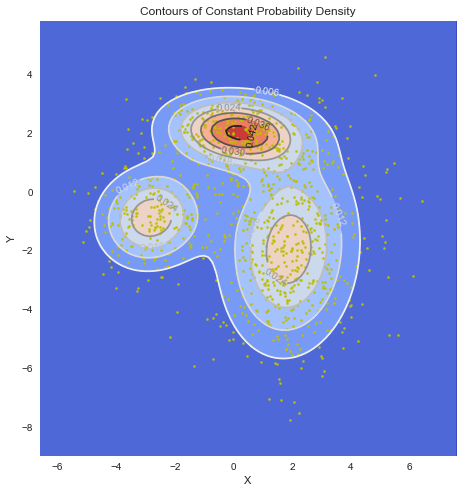

In [1232]:
plt.show()

In [1233]:
plt.figure(figsize=(8,8))
for j in range(len(cset.allsegs)):
    for ii, seg in enumerate(cset.allsegs[j]):
        plt.plot(seg[:,0], seg[:,1], '.-', label=f'Cluster{j}, level{ii}')
plt.scatter(X[:, 0], X[:, 1], s=5)
# plt.legend()

In [1234]:
# plt.show()

### 3D surface plots

In [1237]:
fig = plt.figure(figsize=(6,3.7))
ax = Axes3D(fig)
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
#ax.view_init(60, 35)

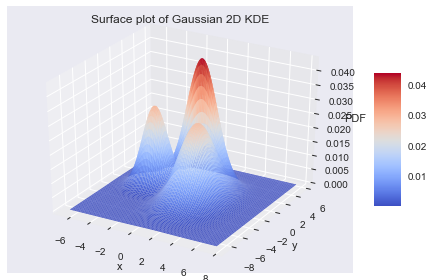

In [1238]:
plt.show()

In [1239]:
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig)
w = ax.plot_wireframe(xx, yy, f)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Wireframe plot of Gaussian 2D KDE')

Text(0.5, 0.92, 'Wireframe plot of Gaussian 2D KDE')

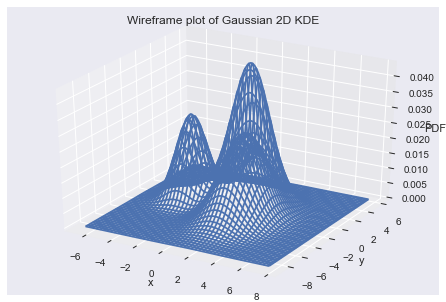

In [1240]:
plt.show()

## Further three clusters (with equal variance)

In [1448]:
n_clusters = 3
n_points = len(data)
Mu = [[2,-2], [0,2], [-3,-1]]   # True value close to 2,-2  0,2  -2,-1
Var = [np.matrix([[2, -1], [-1, 3]]), np.matrix([[2, -1], [-1, 3]]), np.matrix([[2, -1], [-1, 3]])]  
Pi = [1 / n_clusters] * n_clusters
W = np.ones((n_points, n_clusters)) / n_clusters 
# Pi = W.sum(axis=0) / W.sum()

In [1449]:
def update_Var_uni(X, Mu, W):
    n_clusters = W.shape[1]
    Var = [np.matrix([[0, 0], [0, 0]])] * n_clusters
    A = np.matrix([[0, 0], [0, 0]])
    for i in range(n_clusters):
        for j in range(n_points):
            A = A + np.dot(np.matrix((X[j] - Mu[i])).T,np.matrix((X[j] - Mu[i]))) * W[j, i]
    for i in range(n_clusters):
        Var[i] = A/ n_points
    return Var

In [1450]:
def BIC_val(X, Pi, Mu, Var, n_clusters, n_points):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], Var[i])
    return  - 2 * logLH(X, Pi, Mu, Var) + 11 * np.log(n_points)  # 11 for 3 clusters

def AIC_val(X, Pi, Mu, Var, n_clusters):
    n_points, n_clusters = len(X), len(Pi)
    pdfs = np.zeros(((n_points, n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * multivariate_normal.pdf(X, Mu[i], Var[i])
    return  - 2 * logLH(X, Pi, Mu, Var) + 11 * 2  # 11 for 3 clusters

### Process of first five steps

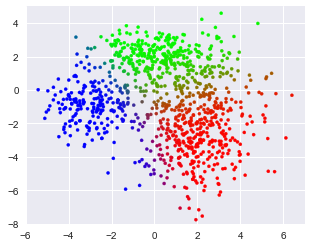

iteration: 1
log-likehood:-4514.641
BIC:9105.268
AIC:9051.282


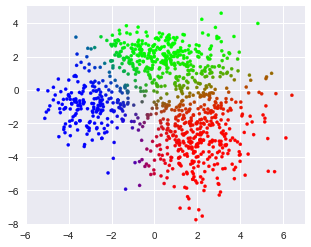

iteration: 2
log-likehood:-4392.229
BIC:8860.443
AIC:8806.458


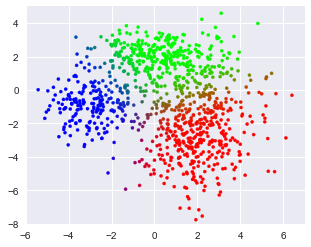

iteration: 3
log-likehood:-4368.281
BIC:8812.548
AIC:8758.562


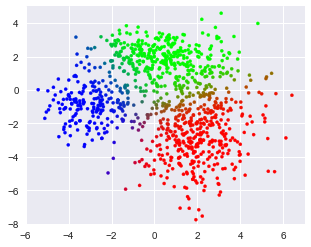

iteration: 4
log-likehood:-4356.591
BIC:8789.168
AIC:8735.183


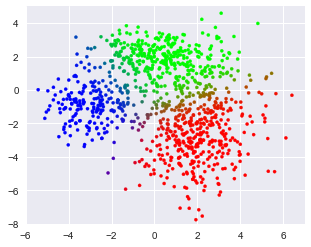

iteration: 5
log-likehood:-4352.776
BIC:8781.537
AIC:8727.551


In [1451]:
loglh = []
bic_val = []
aic_val = []
for i in range(5):
    loglh.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    plot_clusters(data, W)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    print('iteration:' , i+1)
    print('log-likehood:%.3f'%loglh[-1])
    print('BIC:%.3f'%bic_val[-1])
    print('AIC:%.3f'%aic_val[-1])
    Var = update_Var_uni(data, Mu, W)

In [1244]:
# Stop rule1: 100 iteration

loglh_1 = []
bic_val = []
aic_val = []
for i in range(100):
    loglh_1.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var_uni(data, Mu, W)

In [1452]:
# Stop rule2: diff of log-likelihood small enough

loglh_1 = [-1]
bic_val = []
aic_val = []
diff = 1
while diff > 0.01:
    loglh_1.append(logLH(data, Pi, Mu, Var))
    bic_val.append(BIC_val(data, Pi, Mu, Var, n_clusters, n_points))
    aic_val.append(AIC_val(data, Pi, Mu, Var, n_clusters))
    W = update_W(data, Mu, Var, Pi)
    Pi = update_Pi(W)
    Mu = update_Mu(data, W)
    Var = update_Var_uni(data, Mu, W)
    diff = abs(loglh_1[-1] - loglh_1[-2])

### Fitted results

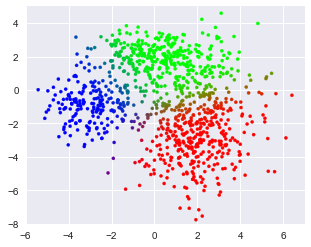

In [1385]:
plot_clusters(data, W)

In [1453]:
print(loglh_1[-1],bic_val[-1], aic_val[-1], Mu, Var, Pi)

-4351.39930165 8778.78391137 8724.7986033 [[ 1.9978558  -2.80594004]
 [ 0.63506153  1.49645789]
 [-2.69462963 -0.70206146]] [matrix([[ 1.98038317,  0.0798471 ],
        [ 0.0798471 ,  2.01178222]]), matrix([[ 1.98038317,  0.0798471 ],
        [ 0.0798471 ,  2.01178222]]), matrix([[ 1.98038317,  0.0798471 ],
        [ 0.0798471 ,  2.01178222]])] [ 0.37628005  0.4060829   0.21763705]


### 2D Contours

In [1248]:
mu1, var1 = Mu[0],  Var[0]
mu2, var2 = Mu[1],  Var[1]
mu3, var3 = Mu[2],  Var[2]

In [1249]:
# Extract x and y

X = data
x = X[:, 0]
y = X[:, 1]

# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)

-6.60167698 7.58644598 -8.9886289 5.8238231


#### Solution 2 (get f) Using EM results as true values, do NOT need generate data points

In [1250]:
D1 = multivariate_normal(mean=mu1, cov=var1)
D2 = multivariate_normal(mean=mu2, cov=var2)
D3 = multivariate_normal(mean=mu3, cov=var3)

def f(x, y):
    return 0.37628005 * D1.pdf([x,y]) + 0.4060829  * D2.pdf([x,y]) +0.21763705* D3.pdf([x,y]) 

x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

z = []
for i in range(100):
    for j in range(100):
        z.append(f(x[i], y[j]))

z = np.array(z) 
f = z.reshape((100, 100))

In [1251]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f) #, colors='k'
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.scatter(X[:, 0], X[:, 1], s=5, c = 'y')
plt.title('2D Gaussian Kernel density estimation')

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

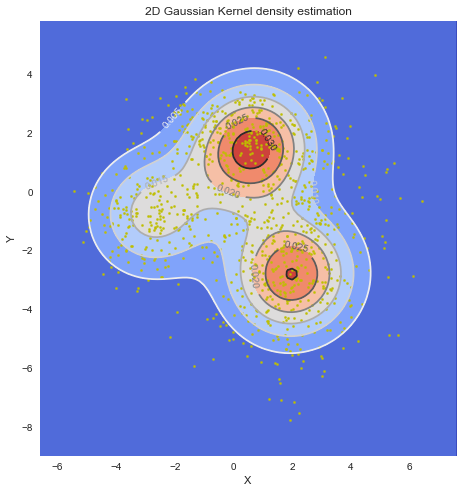

In [1252]:
plt.show()

### 3D surface plot

In [1253]:
fig = plt.figure(figsize=(6,3.7))
ax = Axes3D(fig)
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF

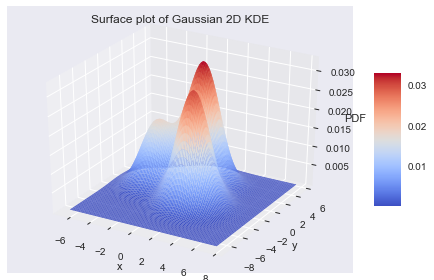

In [1254]:
plt.show()

In [1255]:
fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig)
w = ax.plot_wireframe(xx, yy, f)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Wireframe plot of Gaussian 2D KDE')

Text(0.5, 0.92, 'Wireframe plot of Gaussian 2D KDE')

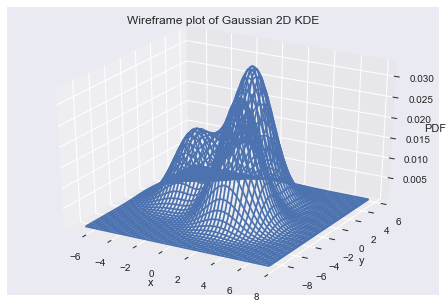

In [1256]:
plt.show()

### How to choose K

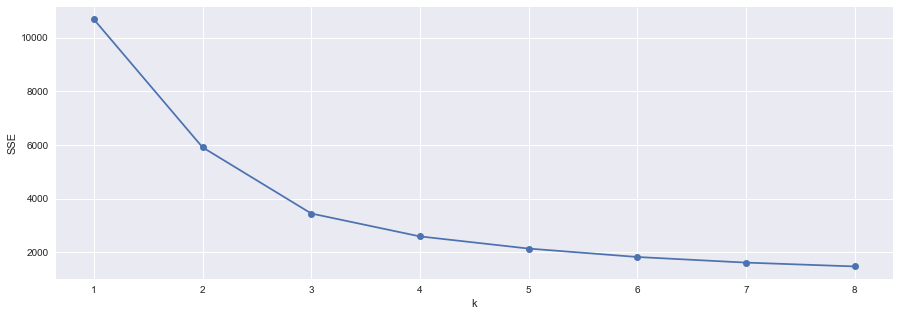

In [1272]:
from sklearn.cluster import KMeans

data = pd.read_csv('GMMdata.txt', sep="\s+")
X = data

SSE = [] 

for k in range(1,9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(X)
    SSE.append(estimator.inertia_)

x = range(1,9)
plt.figure(figsize=(15,5))
plt.xlabel('k')
plt.ylabel('SSE')  
plt.plot(x,SSE,'o-')  
plt.show() 

## Likelihood ratio test to choose among k = 2,3,4

### $H_0$: k=2, $H_a$: k=3

In [1657]:
Mu_true = [[-1.24186589, 0.73987127], [ 1.9416646, -1.8236918 ]] 
Var_true = [np.matrix([[ 3.32370696, 1.91503247],  [ 1.91503247,  2.96495756]]), np.matrix([[ 1.78491736,  0.27716386], [ 0.27716386,  4.92556966]])]
t = 1000
num1, mu1, var1 = int(round(0.47697829*t)),  Mu_true[0],  Var_true[0]
num2, mu2, var2 = int(round(0.52302171*t)),  Mu_true[1],  Var_true[1]

LR = []
random.seed(221)

for i in range(100):
    X1 = np.random.multivariate_normal(mu1, var1, num1)
    X2 = np.random.multivariate_normal(mu2, var2, num2)
    X = np.vstack((X1, X2))

    n_clusters = 2
    n_points = len(X)
    Mu = Mu_true   
    Var = Var_true  
    Pi = [0.45, 0.55]   # [1 / n_clusters] * n_clusters
    W = np.ones((n_points, n_clusters)) / n_clusters 

    loglh_2 = [-1]
    diff = 2
    while diff > 0.01:
        loglh_2.append(logLH(X, Pi, Mu, Var))
        W = update_W(X, Mu, Var, Pi)
        Pi = update_Pi(W)
        Mu = update_Mu(X, W)
        Var = update_Var(data, Mu, W)
        diff = abs(loglh_1[-1] - loglh_1[-2])

    n_clusters = 3
    Mu = [[-1.24186589, 0.73987127], [ 1.9416646, -1.8236918 ],  [ 1.9416646, -1.8236918 ]] 
    Var = [np.matrix([[ 3.32370696, 1.91503247],  [ 1.91503247,  2.96495756]]), 
           np.matrix([[ 1.78491736,  0.27716386], [ 0.27716386,  4.92556966]]), 
            np.matrix([[ 1.78491736,  0.27716386], [ 0.27716386,  4.92556966]]), ]
    Pi =  [0.47697829, 0.51302171, 0.01]  #  [1 / n_clusters] * n_clusters
    W = np.ones((n_points, n_clusters)) / n_clusters 

    loglh_3 = [-1]
    diff = 2
    while diff > 0.01:
        loglh_3.append(logLH(X, Pi, Mu, Var))
        W = update_W(X, Mu, Var, Pi)
        Pi = update_Pi(W)
        Mu = update_Mu(X, W)
        Var = update_Var(data, Mu, W)
        diff = abs(loglh_1[-1] - loglh_1[-2])

    LR.append((loglh_3[-1] - loglh_2[-1])*2)

In [1658]:
LR = np.array(LR)
np.percentile(LR, 99)

5.4151433517742591

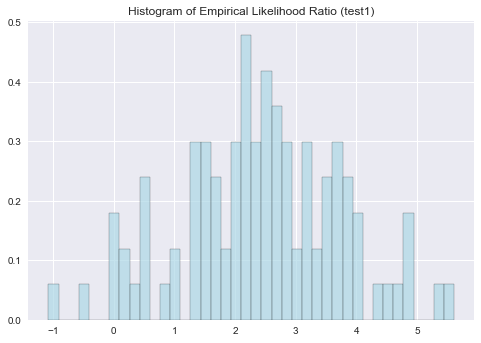

In [1659]:
plt.hist(LR, density=True, bins=40, facecolor="lightblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Empirical Likelihood Ratio (test1)")
plt.show()

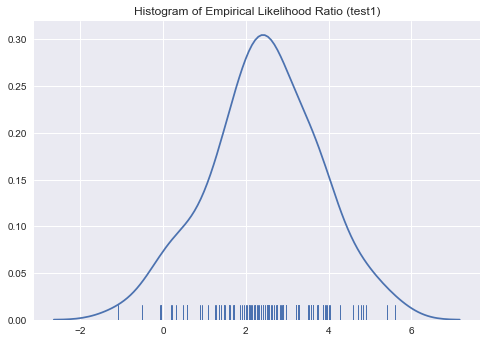

In [1660]:
sns.distplot(LR, kde=True, rug=True, hist=False)
plt.title("Histogram of Empirical Likelihood Ratio (test1)")
plt.show()

### $H_0$: k=3, $H_a$: k=4

In [1647]:
Mu_true = [[ 1.88186909, -1.95266271],
                 [ 0.09473358,  2.04766246],
                 [-2.80084346, -0.87864765]]
Var_true = [np.matrix([[ 1.91675009,  0.22942282], [ 0.22942282,  4.51058426]]), 
            np.matrix([[ 2.05736493, -0.13117201],  [-0.13117201,  0.56407972]]),
            np.matrix([[ 1.19810914,  0.08997519], [ 0.08997519,  1.05092756]])]
t = 1000
n_points =1000
num1, mu1, var1 = int(round(0.51331594 *t)),  Mu_true[0],  Var_true[0]
num2, mu2, var2 = int(round(0.28330177*t)),  Mu_true[1],  Var_true[1]
num3, mu3, var3 = int(round(0.20338228*t)),  Mu_true[2],  Var_true[2]

LR = []
random.seed(221)

for i in range(100):
    X1 = np.random.multivariate_normal(mu1, var1, num1)
    X2 = np.random.multivariate_normal(mu2, var2, num2)
    X3 = np.random.multivariate_normal(mu3, var3, num3)
    X = np.vstack((X1, X2, X3))

    n_clusters = 4
    n_points = len(X)
    Mu = [[-2.83262613, -0.87245166], [ 1.81105045, -3.06246331], [ 1.84487852, -1.41730386], [ 0.08798132,  2.05119434] ] 
    Var = [np.matrix([[ 1.15855155, 0.08577833], [ 0.08577833, 1.05637784]]), 
            np.matrix([[ 0.88151348, -0.08347249], [-0.08347249,  2.83613277]]),
            np.matrix([[ 2.49334038,  0.21162539], [0.21162539,  4.60720611]]),
            np.matrix([[ 2.02821152, -0.15639128], [-0.15639128,  0.54894845]])]
    Pi =[ 0.19935075,  0.15075098,  0.37434135,  0.27555692]   #  [ 0.19935075,  0.15075098,  0.37434135,  0.27555692] 
    W = [[ 0.19935075,  0.15075098,  0.37434135,  0.27555692] ]* n_points  # np.ones((n_points, n_clusters)) / n_clusters 

    loglh_4 = [-1]
    diff = 2
    while diff > 0.01:
        loglh_4.append(logLH(X, Pi, Mu, Var))
        W = update_W(X, Mu, Var, Pi)
        Pi = update_Pi(W)
        Mu = update_Mu(X, W)
        Var = update_Var(data, Mu, W)
        diff = abs(loglh_1[-1] - loglh_1[-2])

    n_clusters = 3
    Mu = Mu_true # [[-2.83262613, -0.87245166], [ 1.84487852, -2], [ 0.08798132,  2.05119434] ] 
    Var = Var_true   # [np.matrix([[ 1.15855155, 0.08577833], [ 0.08577833, 1.05637784]]), 
            # np.matrix([[ 2.49334038,  0.21162539], [0.21162539,  4.60720611]]),
            # np.matrix([[ 2.02821152, -0.15639128], [-0.15639128,  0.54894845]])]
    Pi =[ 0.45,  0.35,  0.2]  # [ 0.5,  0.2,  0.3]
    W = [[ 0.45,  0.35,  0.2] ] * n_points  # np.ones((n_points, n_clusters)) / n_clusters 

    loglh_3 = [-1]
    diff = 2
    while diff > 0.01:
        loglh_3.append(logLH(X, Pi, Mu, Var))
        W = update_W(X, Mu, Var, Pi)
        Pi = update_Pi(W)
        Mu = update_Mu(X, W)
        Var = update_Var(data, Mu, W)
        diff = abs(loglh_1[-1] - loglh_1[-2])

    LR.append((loglh_4[-1] - loglh_3[-1])*2)

In [1648]:
LR = np.array(LR)
np.percentile(LR, 99)

20.46626485257201

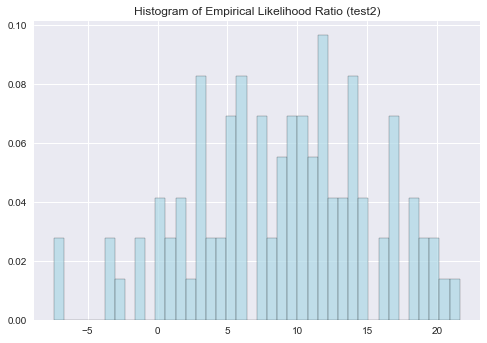

In [1649]:
plt.hist(LR, density=True,  bins=40, facecolor="lightblue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Empirical Likelihood Ratio (test2)")
plt.show()

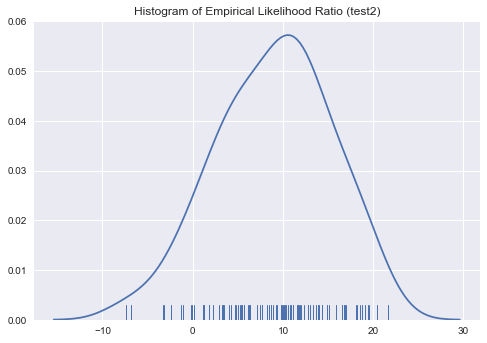

In [1650]:
sns.distplot(LR, kde=True, rug=True, hist=False)
plt.title("Histogram of Empirical Likelihood Ratio (test2)")
plt.show()